In [372]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
from collections import Counter

warnings.filterwarnings(action='ignore')
## font type : otf, ttf
plt.rcParams['font.family'] = 'Gulim'

In [2]:
##target url

target1 ="https://www.etnews.com/news/section.html?id1=20&id2=065&page=82" #에너지
target2 ="https://www.etnews.com/news/section.html?id1=20&id2=020&page=22" #과학

targets=[target1,target2] #리스트로 만들어서 분야를 반복문 
subject="https://www.etnews.com/"
#len(targets)


# 1. 수집
#전자신문 섹션에서 과학, 에너지 소분야 크롤링하여 csv 파일 작성 
#df.columns = [분야, 발행일, 제목, 내용]

첫번째 계획. 
과학 https://www.etnews.com/news/section.html?id1=20&id2=020

에너지 https://www.etnews.com/news/section.html?id1=20&id2=065

로 구분 해서 리스트 만들기 
 

각 주제별로 

페이지 구분해서 url 
https://www.etnews.com/news/section.html?id1=20&id2=020&page=1

페이지 리턴받는 함수로 대상 news_list 만들기 

각 페이지별로 뉴스 12개 

발행일, title return 

발행일을 이용해서 각 뉴스 세부페이지 url 

세부페이지 url 에서 내용 return 

In [138]:
###각 값들을 리턴하는 함수들
### 함수들을 불러오는데 버퍼 오류
#함수의 사용을 적절하게
#타겟 url 리턴하는 함수 
def get_target(target):
  html = urlopen(target)
  bs = soup(html.read(),'html.parser')
  #print(n)
  branch_url = bs.find('a',attrs={'class':'on'}) #분야
  page = bs.find('a',{'href':'javascript:;'}).text
  num_page=int(page)
  #print(branch_url)
  #print(branch_text)
  urls=[]

  for i in range(0,int(page)+1):
    target=subject+ branch_url['href']+"&page="+str(i)
    #target=subject+"&page="+'1'
    urls.append(target)
  return urls

#포기1

In [136]:
#뉴스 url, 분야, 제목을 리스트로 리턴 받기
def get_title(target):
  title_lists=[]
  news_url=[]
  branch_line=[]
  html = urlopen(target)
  bs = soup(html.read(),'html.parser')
  a = bs.find('section',attrs={'class':'main_news_wrap'})
  day = a.find_all(['a'])
  branch_url = bs.find('a',attrs={'class':'on'}) #분야
  branch_text = branch_url.text #분야 명

  new_url = 'https://www.etnews.com'

  for i in day:
    if (i.string)!=None:
      href = i.attrs['href']
      st = i.string
      branch_line.append(branch_text)
      news_url.append(new_url+href)
      title_lists.append(st)
    else:
      pass

  return news_url,branch_line, title_lists
#포기2

In [137]:
#포기
#url 분야 명칭 리턴하는 함수
def get_branch(target):
  branch_line=[]
  html = urlopen(target)
  bs = soup(html.read(),'html.parser')
  branch_url = bs.find('a',attrs={'class':'on'}) #분야
  branch_text = branch_url.text #분야 명
  return branch_text

#내용 리턴 함수 
def get_content(n):
  target = n
  html = urlopen(target)
  bs1 = soup(html.read(),'html.parser')
  content = (bs.find('div',{'class':'article_txt'})).text.replace("\n","")
  return content

#발행일 리턴함수 
def get_date(target):  
  html = urlopen(target)
  bs1 = soup(html.read(),'html.parser')
  con_url = bs1.find('time',{"class":"date"})
  result = con_url.text[6:16]
  return result


##반복문이 많아서 자꾸 오류가 생기는 걸로 추정됨, 각 함수들로 리스트에 저장되다가 중간에 끊김발생-> 아래 메인으로 함수로 호출하던 부분들 통합하기 
-> try-except문으로 오류처리? -> 다섯번중에 세번정도 페이지 끝까지 안가는 오류가 자꾸 생김.-> 페이지 프린트 해서 확인해보기

In [36]:
#메인 
html = urlopen(target2)
bs = soup(html.read(),'html.parser')
branch_url = bs.find('a',attrs={'class':'on'}) #분야
page = bs.find('a',{'href':'javascript:;'}).text
page_df=pd.DataFrame()

try:
    for i in range(1,int(page)+1):
      target=subject+ branch_url['href']+"&page="+str(i)
      #target=subject+"&page="+'1'
      html = urlopen(target)
      bs = soup(html.read(),'html.parser')
      a = bs.find('section',attrs={'class':'main_news_wrap'})
      day = a.find_all(['a'])
      print(f'{i}')

      news_urls=[]
      for i in day:
        if (i.string)!=None:
          href = i.attrs['href']
          news_urls.append(subject+href)

      for i in news_urls:
        html = urlopen(i)
        bs = soup(html.read(),'html.parser')
        date = bs.find('time',{"class":"date"}).text[6:16]#발행일
        title = bs.find('h2').text
        content = (bs.find('div',{'class':'article_txt'})).text.replace("\n","")#내용
        page_df = pd.concat([page_df,pd.DataFrame({"분야":"과학","발행일":[date],"제목":[title],"내용":[content]})])
except:
     pass


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [37]:
page_df

,분야,발행일,제목,내용
0,과학,2023-09-13,[과학기술이 미래다] 〈102〉국내 첫 퍼스널 컴퓨터 경진대회,<1984년 4월 22일 제1회 전국 퍼스널 컴퓨터 경진대회 모습. 국가기록원 제공...
0,과학,2023-09-13,나노·소재 성과공유회,나노·소재분야 R&D 정책 및 우수 연구성과를 발표하고 성과물을 공유하는 나노·소재...
0,과학,2023-09-12,[알림] 테크비즈코리아 2023,<테크비즈 코리아 2023>전자신문사가 올해에도 우리 연구 현장의 사업화 유망기술을...
0,과학,2023-09-12,드럼치는 로봇 '모펫' 입니다,국내 연구진이 음악 빅데이터 기반 인공지능(AI)을 통해 인간과 상호작용하며 합주 ...
0,과학,2023-09-11,드럼치는 로봇 '모펫' 입니다,국내 연구진이 음악 빅데이터 기반 인공지능(AI)을 통해 인간과 상호작용하며 합주 ...
...,...,...,...,...
0,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...
0,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...
0,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...
0,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...


In [43]:
sc_df = page_df
sc_df.to_csv("C:/Users/notro/sc_data.csv")

In [38]:
html = urlopen(target1)
bs = soup(html.read(),'html.parser')
branch_url = bs.find('a',attrs={'class':'on'}) #분야
page = bs.find('a',{'href':'javascript:;'}).text
page_df1=pd.DataFrame()

try:
    for i in range(1,int(page)+1):
      target=subject+ branch_url['href']+"&page="+str(i)
      #target=subject+"&page="+'1'
      html = urlopen(target)
      bs = soup(html.read(),'html.parser')
      a = bs.find('section',attrs={'class':'main_news_wrap'})
      day = a.find_all(['a'])
      print(f'{i}')
      news_urls=[]
 
      for i in day:
        if (i.string)!=None:
          href = i.attrs['href']
          news_urls.append(subject+href)

      for i in news_urls:
        html = urlopen(i)
        bs = soup(html.read(),'html.parser')
        date = bs.find('time',{"class":"date"}).text[6:16]#발행일
        title = bs.find('h2').text
        content = (bs.find('div',{'class':'article_txt'})).text.replace("\n","")#내용
        page_df1 = pd.concat([page_df1,pd.DataFrame({"분야":"에너지","발행일":[date],"제목":[title],"내용":[content]})])
except:
    pass


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80


In [39]:
page_df1

,분야,발행일,제목,내용
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...
0,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...
0,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ..."
0,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...
0,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...
...,...,...,...,...
0,에너지,2023-03-19,[대한민국 대전환 'ON' 시즌2] ICT 기술로 우리집도 에너지 효율↑,<ⓒ게티이미지뱅크>정보통신기술(ICT)을 활용해 가정에서도 에너지 효율 기술이 주목...
0,에너지,2023-03-19,[대한민국 대전환 'ON' 시즌2]'사각지대' 중소·중견기업 에너지 효율 개선 주춧...,<ⓒ게티이미지뱅크>산업통상자원부는 에너지 효율의 사각지대인 중소·중견기업의 에너지 ...
0,에너지,2023-03-19,[르포]역대급 섬 가뭄…해수담수화 선박·지하수 저류댐 '해갈',<환경부가 세계 최초 300㎥/일 급 해상이동형 해수담수화 플랜트 선박 드림즈호에서...
0,에너지,2023-03-19,"박정원·박지원 두산그룹 회장·부회장, 美서 건설장비 경영 전략 논의",<박정원 두산그룹 회장. [사진= 두산그룹 제공]>두산그룹은 박정원 회장과 박지원 ...


In [40]:
en_df = page_df1
en_df.to_csv("C:/Users/notro/en_data.csv")

In [44]:
df = pd.concat([en_df,sc_df]) #데이터프레임 합치기 
df

,분야,발행일,제목,내용
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...
0,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...
0,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ..."
0,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...
0,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...
...,...,...,...,...
0,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...
0,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...
0,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...
0,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...


In [ ]:
res_df = df.copy()

res_df.to_csv("C:/Users/notro/조정아_수집.csv")

In [144]:
res_df = pd.read_csv('C:/Users/notro/조정아_수집.csv')

In [145]:
res_df

,Unnamed: 0,분야,발행일,제목,내용
0,0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...
1,0,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...
2,0,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ..."
3,0,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...
4,0,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...
...,...,...,...,...,...
1492,0,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...
1493,0,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...
1494,0,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...
1495,0,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...


In [146]:
res_df.drop('Unnamed: 0',axis=1,inplace=True)
res_df

,분야,발행일,제목,내용
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ..."
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...
...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...


# 2. 가공 및 처리 
수집한 CSV 파일에서 에너지 관련 단어의 빈도수를 도출
(전기, 에너지, 원자력, 수력, 화력)

In [147]:
key = ['전기','에너지','원자력','수력','화력']

In [148]:
#res2 = res_df['내용'].str.count('전기').reset_index()
#res2 = res_df['내용'].str.contains('전기').sum() #True, False로 구분되서 출력됨 

for i in key:
    res2 = res_df['내용'].str.count(i).reset_index()
    res2 = res2.iloc[:,1:]
    res2.rename(columns={"내용":i},inplace=True)
    key_df = pd.merge(res_df,res2,left_index=True,right_index=True) # res_df 에 merge를 해야 추가 된다는 것... 데이터프레임 명칭 바꾸니까 화력만 나왔음
    
key_df

,분야,발행일,제목,내용,화력
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",0
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,0
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0
...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0


In [149]:
#res2 = res_df['내용'].str.count('전기').reset_index()
#res2 = res_df['내용'].str.contains('전기').sum() #True, False로 구분되서 출력됨 

for i in key:
    
    res2 = res_df['내용'].str.count(i).reset_index()
    res2 = res2.iloc[:,1:] # res=res2.iloc[:,1]은 프레임으로 안나옴.
    res2.rename(columns={"내용":i},inplace=True)    
    res_df = pd.merge(res_df,res2,left_index = True,right_index=True)

res_df

,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0


In [150]:
result_df = res_df
result_df.to_csv("C:/Users/notro/조정아_가공처리.csv")

In [151]:
key_df = pd.read_csv('C:/Users/notro/조정아_가공처리.csv')

In [152]:
key_df

,Unnamed: 0,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력
0,0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0
1,1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0
2,2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0
3,3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0
4,4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1492,1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0
1493,1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0
1494,1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0
1495,1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0


In [153]:
key_df.drop('Unnamed: 0',axis=1,inplace=True)
key_df

,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0


# 3. 통계분석
(전기, 에너지, 원자력, 수력, 화력) (평균, 표준편차, 최빈단어) 구하기

In [173]:
# 평균 mean()
# 표준편차 std()
# 최빈값 mode()
key = ['전기','에너지','원자력','수력','화력']

In [174]:
# describe() 메서드 
# 기본적인 몇가지 기술통계를 자동으로 추출
key_df.describe()

,전기,에너지,원자력,수력,화력
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,1.121576,2.472946,0.293921,0.057448,0.024048
std,3.333900,5.211384,1.433619,0.313531,0.218059
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000
max,39.000000,57.000000,19.000000,4.000000,5.000000


In [175]:
#describe() 값과 비교해보기 
# 평균 구하기 
key_df['전기'].mean()

1.1215764863059452

In [557]:

m_res_list=[]
for i in key:
    m_res = key_df[i].mean()
    print(i + "평균 : "+ str(m_res))
    m_res_list.append(m_res)

에너지평균 : 2.472945891783567
전기평균 : 1.1215764863059452
원자력평균 : 0.2939211756847027
수력평균 : 0.05744822979291917
화력평균 : 0.02404809619238477


In [560]:
#표준편차 구하기 
std_res_list=[]
for i in key:
    std_res = key_df[i].std()
    print(i+"표준편차 : "+str(std_res))
    std_res_list.append(std_res)

에너지표준편차 : 5.211384231407694
전기표준편차 : 3.333899881838207
원자력표준편차 : 1.433619135382007
수력표준편차 : 0.31353113543352845
화력표준편차 : 0.2180588102875779


In [561]:
#분산구하기 
var_res_list=[]
for i in key:
    var_res = key_df[i].var()
    print(i+"분산 :"+str(var_res))
    var_res_list.append(var_res)

에너지분산 :27.158525607364755
전기분산 :11.11488842212081
원자력분산 :2.0552638253334528
수력분산 :0.09830177288623755
화력분산 :0.047549644744033885


In [563]:
# 최대 
max_res_list=[]
for i in key:
    max_res = key_df[i].max()
    print(i+"최대값 :"+str(max_res))
    max_res_list.append(max_res)

에너지최대값 :57
전기최대값 :39
원자력최대값 :19
수력최대값 :4
화력최대값 :5


In [580]:
# 최소
min_res_list=[]
for i in key:
    min_res = key_df[i].min()
    print(i+"최솟값 :"+str(min_res))
    min_res_list.append(min_res)

에너지최솟값 :0
전기최솟값 :0
원자력최솟값 :0
수력최솟값 :0
화력최솟값 :0


In [581]:
stat_df=pd.DataFrame({'평균':m_res_list,'표준편차':std_res_list,'분산':var_res_list,'최대값':max_res_list,'최솟값':min_res_list},index=key)
stat_df

,평균,표준편차,분산,최대값,최솟값
에너지,2.472946,5.211384,27.158526,57,0
전기,1.121576,3.333900,11.114888,39,0
원자력,0.293921,1.433619,2.055264,19,0
수력,0.057448,0.313531,0.098302,4,0
화력,0.024048,0.218059,0.047550,5,0


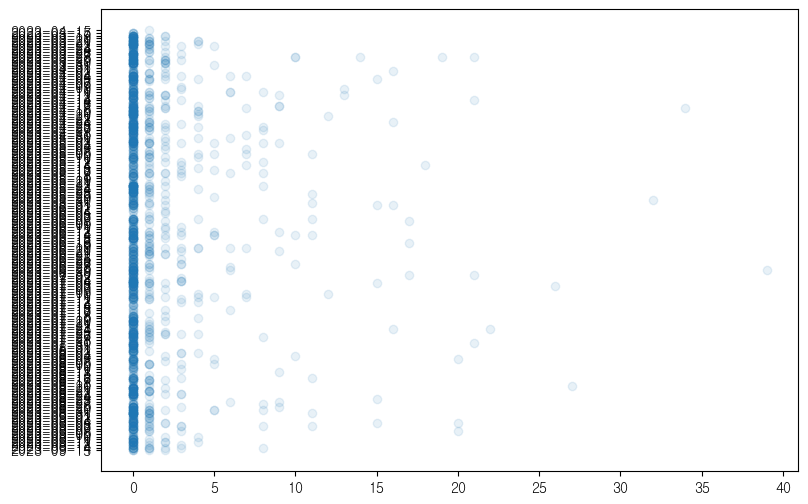

In [223]:
plt.figure(figsize=(9,6)) # 너비, 높이
x = key_df['전기']
y = key_df['발행일']
plt.scatter(x,y,alpha=0.1)
plt.show()

#가독성을 높이기 위해 일자를 월로 구분 해야겠음 

In [224]:
key_df['발행일'] #발행일 전부 2023년이므로 월별로 구분해보기 

0       2023-09-15
1       2023-09-15
2       2023-09-15
3       2023-09-15
4       2023-09-15
           ...    
1492    2023-03-19
1493    2023-03-19
1494    2023-03-17
1495    2023-03-17
1496    2023-03-17
Name: 발행일, Length: 1497, dtype: object

In [229]:
key_df.dtypes

분야     object
발행일    object
제목     object
내용     object
전기      int64
에너지     int64
원자력     int64
수력      int64
화력      int64
dtype: object

In [232]:
key_df['발행'] = key_df['발행일'].apply(lambda x : pd.to_datetime(str(x),format='%Y-%m-%d'))

In [247]:
key_df['발행월']=key_df['발행'].dt.strftime('%m')
key_df

,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력,발행,발행월
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0,2023-09-15,09
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0,2023-09-15,09
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0,2023-09-15,09
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0,2023-09-15,09
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0,2023-09-15,09
...,...,...,...,...,...,...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0,2023-03-19,03
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0,2023-03-19,03
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0,2023-03-17,03
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0,2023-03-17,03


In [535]:
key_df

,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력,발행월
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0,09
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0,09
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0,09
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0,09
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0,09
...,...,...,...,...,...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0,03
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0,03
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0,03
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0,03


In [543]:
#최빈값 

mode_res = key_df['발행월'].mode()
print(mode_res+"월")

0    04월
Name: 발행월, dtype: object



# 4. 시각화

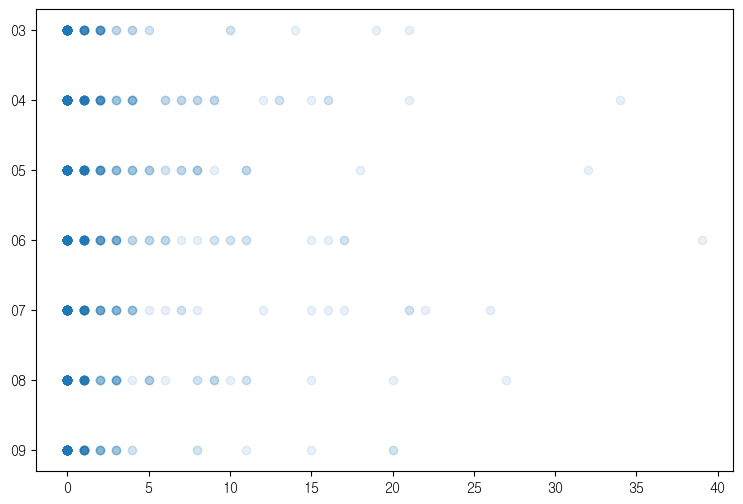

In [544]:
#월별 '전기' 키워드 빈도수 
plt.figure(figsize=(9,6)) # 너비, 높이
x = key_df['전기']
y = key_df['발행월']
plt.scatter(x,y,alpha=0.1)
plt.show()

#가독성을 높이기 위해 일자를 월로 구분 해야겠음 

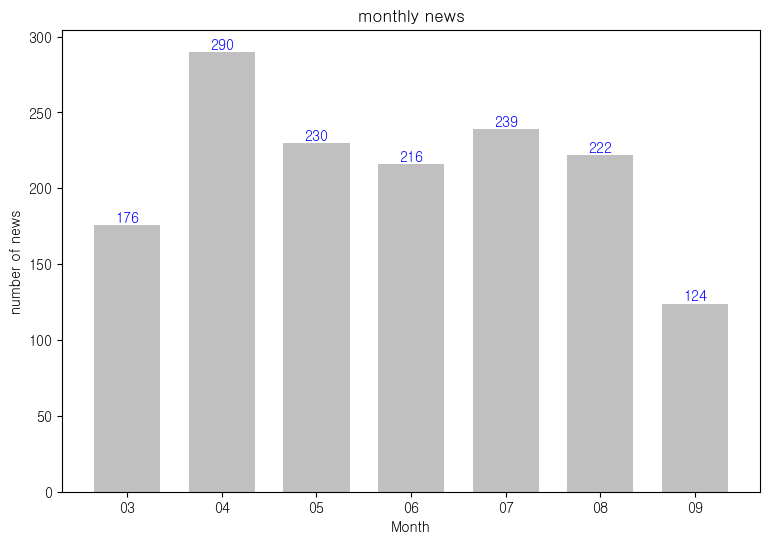

In [500]:
#월별 발행 뉴스 건수 (막대그래프)
plt.figure(figsize=(9,6)) # 너비, 높이

count_m = key_df['발행월'].value_counts()
count_m = count_m.sort_index()
y = count_m.values
x = count_m.index
plt.bar(x,y,width=0.7,color='silver')
plt.title('monthly news')
plt.xlabel('Month')
plt.ylabel('number of news')

for idx, val in count_m.items():
    plt.annotate(val,(idx,val),xytext=(0,2),textcoords='offset points',fontsize=10,ha='center',color='blue')

plt.show()

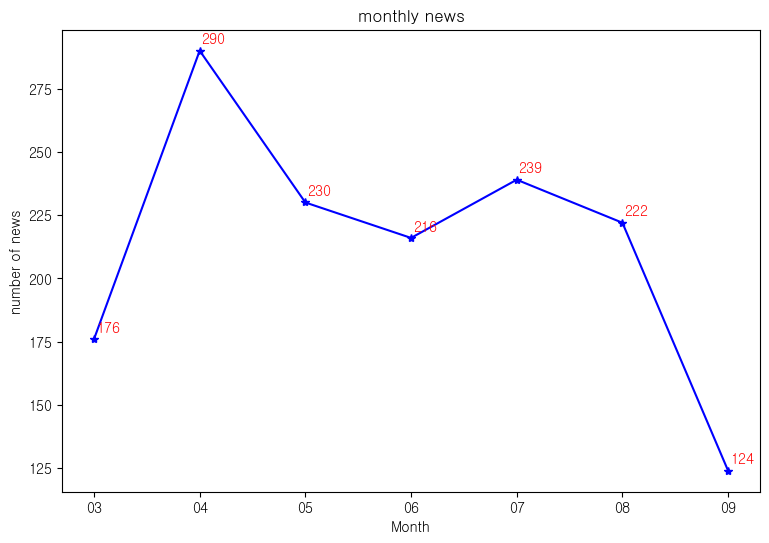

In [313]:
#월별 발행 뉴스 건수(선그래프)
plt.figure(figsize=(9,6)) # 너비, 높이

count_m = key_df['발행월'].value_counts()
count_m = count_m.sort_index()
y = count_m.values
x = count_m.index
plt.plot(x,y,'*-b')
plt.title('monthly news')
plt.xlabel('Month')
plt.ylabel('number of news')

for idx, val in count_m[::1].items():
    plt.annotate(val,(idx,val),xytext=(10,5),textcoords='offset points',fontsize=10,ha='center',color='r')

plt.show()

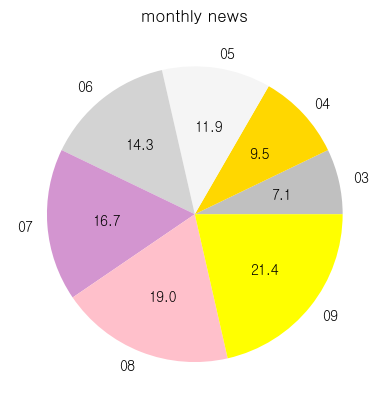

In [526]:
#월별 발행 뉴스 건수(원그래프)

count_m = key_df['발행월'].value_counts()
count_m = count_m.sort_index()
x = count_m.index
colors = ['silver', 'gold', 'whitesmoke', 'lightgray','#d395d0','pink','yellow','lightpink']
plt.pie(x,labels=x,autopct = "%1.1f",colors = colors)
plt.title('monthly news')

plt.show()

In [278]:
branch = key_df['분야'].value_counts()
branch

에너지    1191
과학      306
Name: 분야, dtype: int64

In [497]:
line1 = key_df[key_df['분야']=='에너지']
line2 = key_df[key_df['분야']=='과학']

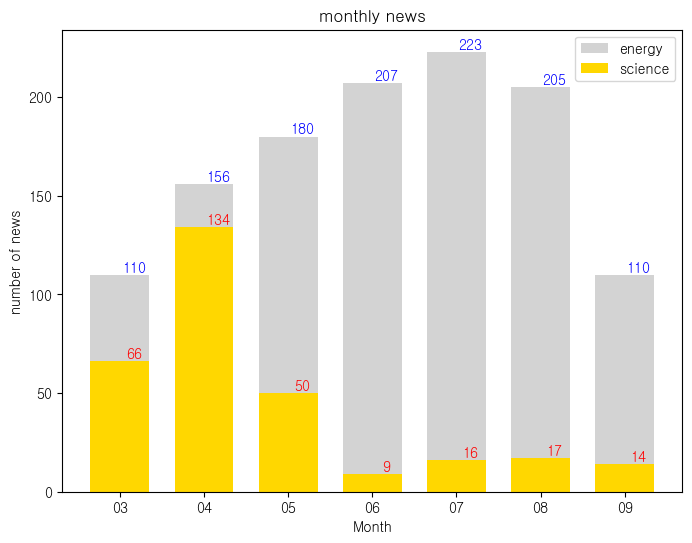

In [504]:
# 분야를 구분하여 월별 뉴스 발행건수 (막대그래프)

fig, ax = plt.subplots(figsize=(8,6))
count_m = line1['발행월'].value_counts()
count_m = count_m.sort_index()
count_m1 = line2['발행월'].value_counts()
count_m1 = count_m1.sort_index()
x = count_m.index
y = count_m.values

x1=count_m1.index
y1=count_m1.values

plt.bar(x,y,width=0.7,color='lightgray',label='energy')
plt.bar(x1,y1,width=0.7,color='gold',label='science')

plt.title('monthly news')
plt.xlabel('Month')
plt.ylabel('number of news')

for idx, val in count_m[::1].items():
    plt.annotate(val,(idx,val),xytext=(10,2),textcoords='offset points',fontsize=10,ha='center',color='b')

for idx, val in count_m1[::1].items():
    plt.annotate(val,(idx,val),xytext=(10,2),textcoords='offset points',fontsize=10,ha='center',color='r')
    
ax.legend()
plt.show()

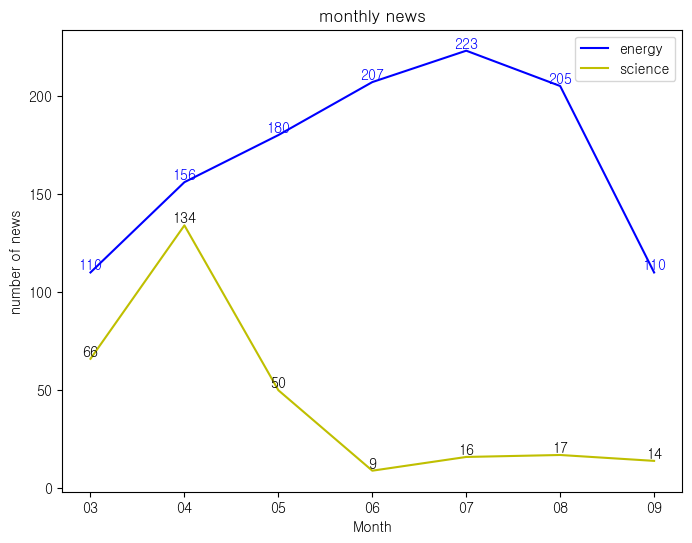

In [329]:
# 분야를 구분하여 월별 뉴스 발행건수 (선그래프)

fig, ax = plt.subplots(figsize=(8,6))
count_m = line1['발행월'].value_counts()
count_m = count_m.sort_index()
count_m1 = line2['발행월'].value_counts()
count_m1 = count_m1.sort_index()
x = count_m.index
y = count_m.values

x1=count_m1.index
y1=count_m1.values

plt.plot(x,y,color='b',label='energy')
plt.plot(x1,y1,color='y',label='science')

plt.title('monthly news')
plt.xlabel('Month')
plt.ylabel('number of news')

for idx, val in count_m[::1].items():
    plt.annotate(val,(idx,val),xytext=(0,2),textcoords='offset points',fontsize=10,ha='center',color='b')

for idx, val in count_m1[::1].items():
    plt.annotate(val,(idx,val),xytext=(0,2),textcoords='offset points',fontsize=10,ha='center',color='k')
    
ax.legend()
plt.show()

In [340]:
group_df=key_df[['발행월','전기','에너지','원자력','수력','화력']].groupby('발행월').sum()

In [341]:
group_df

,전기,에너지,원자력,수력,화력
발행월,,,,,
03,146,346,12,9,2
04,331,614,97,15,9
05,270,600,76,16,1
06,299,638,124,18,9
07,266,600,64,15,6
08,230,672,44,9,9
09,137,232,23,4,0


In [353]:
group_df = group_df.reset_index()

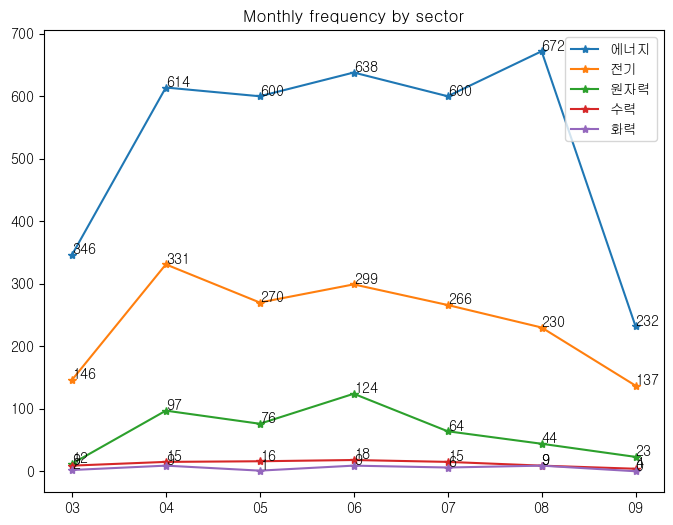

In [385]:
#발행 월별 각 단어 빈도수 (선그래프)
key = ['에너지','전기','원자력','수력','화력']
fig, ax = plt.subplots(figsize=(8,6))

for i in key:
    ax.plot(group_df['발행월'],group_df[i],label=i,marker='*')
    for idx,val in group_df[i].items():
        ax.annotate(val,(idx,val),xytext=(idx,val+1))

ax.set_title('Monthly frequency by sector')

ax.legend()

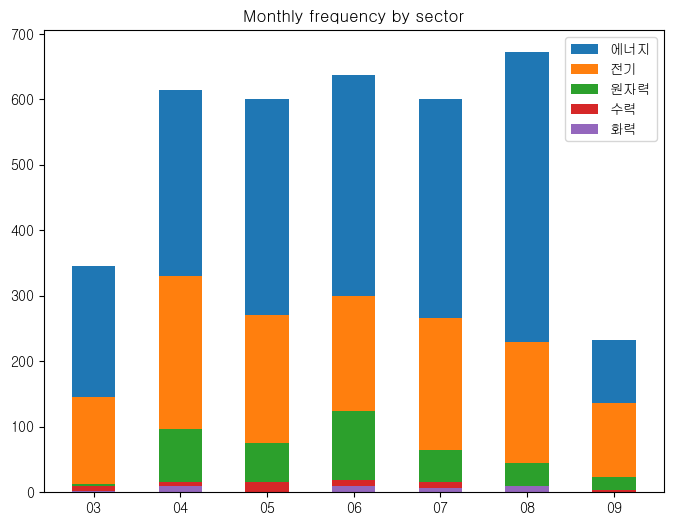

In [524]:
#발행 월별 각 단어 빈도수 (막대그래프)
key = ['에너지','전기','원자력','수력','화력']
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Monthly frequency by sector')

for i in key:
    ax.bar(group_df['발행월'],group_df[i],width=0.5,label=i)
 
    ax.legend()

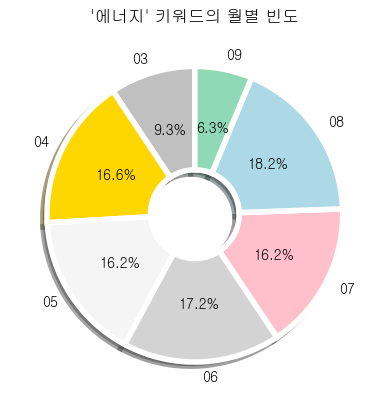

In [570]:
#'에너지'의 월별 빈도수 비율 (원그래프)

ax.set_title('Monthly frequency by sector')
labels=key
colors = ['silver', 'gold', 'whitesmoke', 'lightgray','pink','lightblue','#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4}
#for i in key:
plt.title("'에너지' 키워드의 월별 빈도")
plt.pie(group_df['에너지'],labels = group_df['발행월'],autopct = "%1.1f%%",colors = colors,shadow=True,startangle=90,wedgeprops=wedgeprops)
plt
        
plt.show()

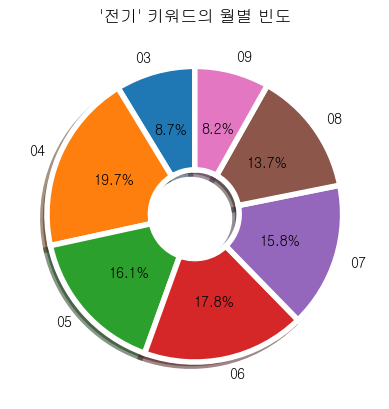

In [530]:
#'전기'의 월별 빈도수 비율 (원그래프)

ax.set_title('Monthly frequency by sector')
labels=key

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 4}
#for i in key:
plt.title("'전기' 키워드의 월별 빈도")
plt.pie(group_df['전기'],labels = group_df['발행월'],autopct = "%1.1f%%",shadow=True,startangle=90,wedgeprops=wedgeprops)
plt
        
plt.show()

In [585]:
key_df['발행일자']=key_df['발행'].dt.strftime('%d')
key_df

,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력,발행월,발행,발행일자
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0,09,2023-09-15,15
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0,09,2023-09-15,15
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0,09,2023-09-15,15
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0,09,2023-09-15,15
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0,09,2023-09-15,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0,03,2023-03-19,19
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0,03,2023-03-19,19
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0,03,2023-03-17,17
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0,03,2023-03-17,17


In [ ]:
key_df.drop('발행',axis=1,inplace=True)
key_df

In [601]:
key_df['발행월'].sort_index()

0       09
1       09
2       09
3       09
4       09
        ..
1492    03
1493    03
1494    03
1495    03
1496    03
Name: 발행월, Length: 1497, dtype: object

In [617]:
key_df

,분야,발행일,제목,내용,전기,에너지,원자력,수력,화력,발행월,발행일자
0,에너지,2023-09-15,120조원 프로젝트 '용인 클러스터' 찾은 최태원 회장 “기존 이상의 도전 필요”,<최태원 SK 회장(오른쪽)과 박정호 SK하이닉스 대표이사 부회장이 15일 용인 반...,0,2,0,0,0,09,15
1,에너지,2023-09-15,"바스티안-유스투스 슈미트 인앱터 회장 “AEM 수전해, 내년까지 경제성 확보”",<바스티안-유스투스 슈미트 인앱터 회장>“인앱터(Enapter)는 2년 안에 음이온...,0,1,0,0,0,09,15
2,에너지,2023-09-15,"E-순환거버넌스, 쌍용씨앤비, 모나리자와 E-waste 자원순환 업무협약 체결","<권나영 E-순환거버넌스 부장, 정덕기 E-순환거버넌스 이사장, 정창석 쌍용씨앤비 ...",1,0,0,0,0,09,15
3,에너지,2023-09-15,"한양대 ERICA, DC그리드 에너지 혁신연구센터 개소",<한양대 ERICA캠퍼스에서 개최된 'DC그리드 에너지 혁신연구센터 개소식'에서 관...,2,6,0,0,0,09,15
4,에너지,2023-09-15,"최태원 SK 회장 “울산, 디지털화로 제조 AI 중심 소프트웨어 메카될 것”",<최태원 SK그룹 회장(앞줄 왼쪽 일곱번째)과 김준 SK이노베이션 부회장(앞줄 왼쪽...,0,0,0,0,0,09,15
...,...,...,...,...,...,...,...,...,...,...,...
1492,과학,2023-03-19,"킴스레퍼런스, 'KOLAS 공인표준물질' 생산기관 인정...차세대 소자 측정 신뢰성...",<킴스레퍼런스 KOLAS 공인표준물질생산기관 현판>첨단표준물질 제조기업 킴스레퍼런스...,0,0,0,0,0,03,19
1493,과학,2023-03-19,우리 아이가 주인공인 소셜 플랫폼 '놀잇' 비대면 놀이터로 부상,수·언어·인지교육 콘텐츠를 주로 다루는 영유아동 전문 에듀테크 플랫폼이 넘쳐나는 가...,0,0,0,0,0,03,19
1494,과학,2023-03-17,[사이언스온고지신]과학기술 강국 첫걸음...분석과학 인재 양성,<권희석 한국기초과학지원연구원(KBSI) 책임연구원>분석과학은 과학기술 분야 전반에...,0,0,0,0,0,03,17
1495,과학,2023-03-17,"[과학핫이슈]지구와 '쌍둥이' 금성, 활화산 증거 확인",지구와 닮은 '쌍둥이 행성' 금성에서 활화산 활동 증거가 처음으로 확인됐다.미국 페...,0,0,0,0,0,03,17


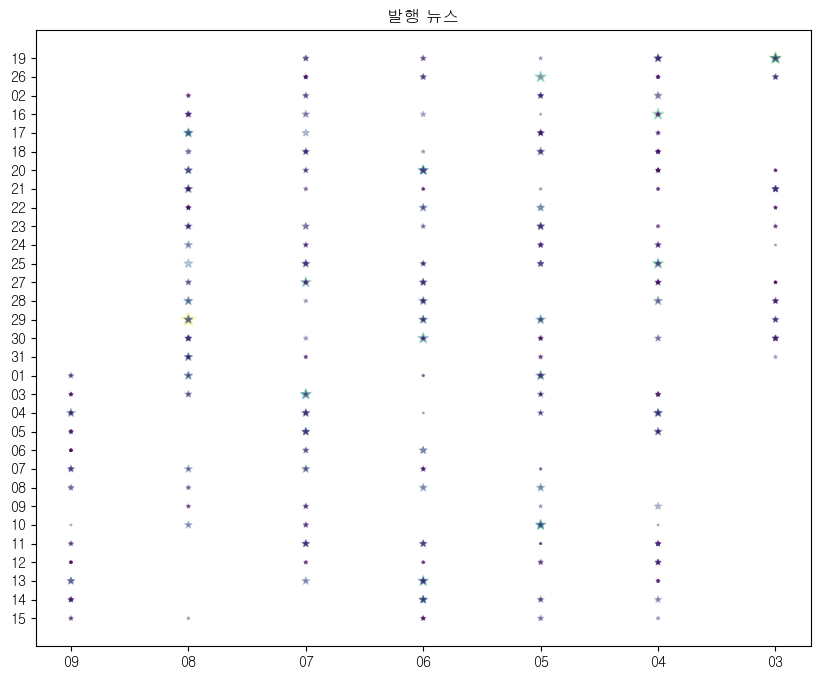

In [631]:
fig,ax = plt.subplots(figsize=(10,8))

ax.scatter(key_df['발행월'],key_df['발행일자'],marker="*",alpha=0.3,s=key_df['에너지']*2,c=key_df['에너지'])

ax.set_title("발행 뉴스")
fig.show()

#월과 일자별로 구분해서 '에너지'.키워드의 빈도수 
# 일자와 월을 정렬해야 하는데,, 실패 하였습니다.